# Description
This ipynb contains the tests for all the classifiers 
(Simploy checking that they work, not optimizing hyperparameters and stuff).
It uses the male-female database seen in labs

In [1]:
from helpers import *
import classifiers

In [2]:
## load data.
height, weight, gender = load_data()

seed = 1
# build sampled x and y.
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)
tx = np.c_[np.ones((y.shape[0], 1)), x]

y = 1.0*y
y = y.ravel()

# Centroids classifier

In [3]:
#build the classifier
clf = classifiers.ClassifierCentroids()
#train the classifier
clf.train(tx, y)
#output predictions
print('Predictions: ', clf.accuracy(clf.predict(tx), y))
#output predictions in a fancy way
clf.get_params_and_results(tx, tx, y, y )

Predictions:  0.865


{'accuracy_train': 0.865,
 'accuracy_test': 0.865,
 'params': {'name': 'ClassifierCentroids'}}

# Ridge regression

In [4]:
#recast y in needed form
y = 2*y - 1

In [5]:
#build the classifier
clf = classifiers.ClassifierLinearRegression(0.7, 'L2')
#train the classifier
clf.train(y, tx)
#output predictions
print('Predictions: ', clf.accuracy(clf.predict(tx), y))
#output the weights
print('Weights', clf.w)
#output predictions in a fancy way
clf.get_params_and_results(tx, tx, y, y )

Predictions:  0.915
Weights [ 0.01993024  0.2760528  -1.0468083 ]


{'accuracy_train': 0.915,
 'accuracy_test': 0.915,
 'params': {'name': 'ClassifierLinearRegression',
  'lambda': 0.7,
  'regularizer': 'L2'}}

# Logistic Regression

In [6]:
#recast y in needed form
y = (y + 1)/2
y

array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.])

In [23]:
#build the classifier
clf = classifiers.ClassifierLogisticRegression(
    lambda_ = 0, 
    regularizer = None, 
    gamma=0.001, 
    max_iterations = 1000, 
    w_sampling_distr='normal',
    min_max_iterations=300,
    threshold = 1e-5, 
    )

#train the classifier
clf.train(y, tx, verbose = True, batch_size = 10, normalize_gradient = True)
#output predictions
print('Predictions: ', clf.accuracy(clf.predict(tx), y))
#output predictions in a fancy way
clf.get_params_and_results(tx, tx, y, y )

Current iteration=0, loss=4.8245855929920785
Current iteration=100, loss=2.9529764046921576
Current iteration=200, loss=2.384552502410461
Current iteration=300, loss=2.1536536552913605
Current iteration=400, loss=2.0362075309351346
Current iteration=500, loss=1.966268627874235
Current iteration=600, loss=1.9192923335179919
Current iteration=700, loss=1.884591249276031
Current iteration=800, loss=1.856980440699352
Current iteration=900, loss=1.8337385438470728
Predictions:  0.855


{'accuracy_train': 0.855,
 'accuracy_test': 0.855,
 'params': {'name': 'LogisticRegression',
  'lambda_': 0,
  'regulairizer': None,
  'gamma': 0.001,
  'max_iterations': 1000,
  'threshold': 1e-05,
  'weights': array([ 0.16306611, -1.19594611, -1.66611681]),
  'normalize_gaddient': True,
  'initial_w': array([ 1.38958819, -0.71760416, -0.11181366]),
  'w_sampling_distr': 'normal'}}

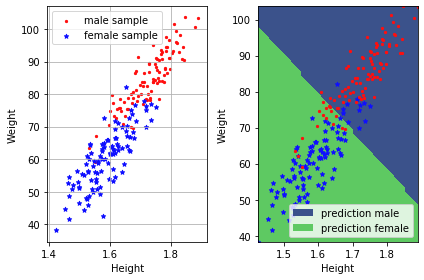

In [24]:
#Additional: visdualization tool
from plots import visualization
visualization(y, x, mean_x, std_x, clf.w.T, "classification_by_logistic_regression_gradient_descent", True)

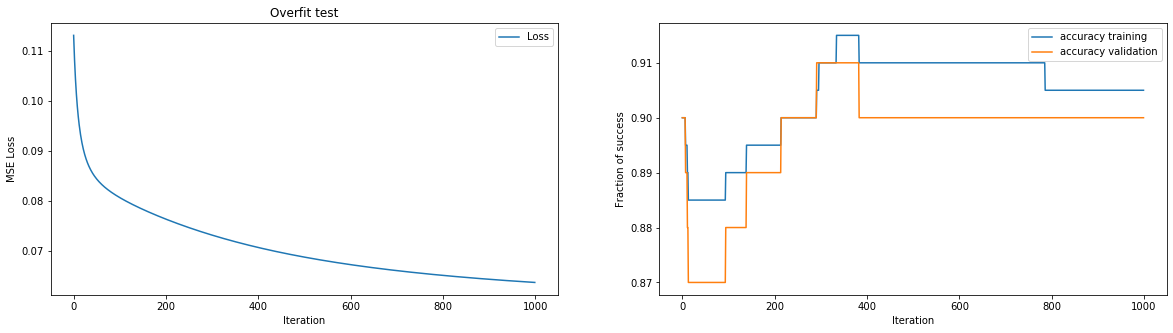

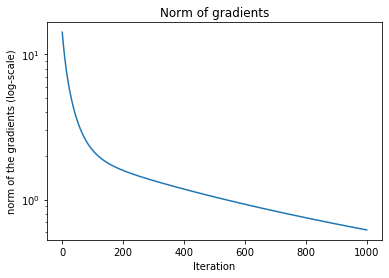

In [20]:
#Additional: training plots
from plots import training_plots

#train classifier storing relevant quantities
clf.train(y, tx, verbose = False, 
    store_gradient=True, 
    store_losses = True, 
    tx_validation=tx[:100], 
    y_validation = y[:100], 
    normalize_gradient=False)

training_plots(clf, show_gradient=True)

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([-4.55632726, -4.0140538 , -3.47178034, -2.92950688, -2.38723342,
        -1.84495996, -1.3026865 , -0.76041304, -0.21813958,  0.32413388,
         0.86640734]),
 <a list of 10 Patch objects>)

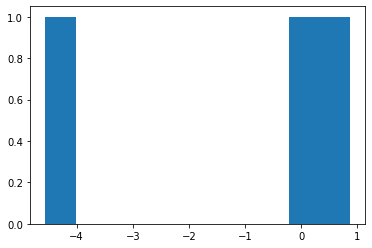

In [10]:
import matplotlib.pyplot as plt
plt.hist(clf.w, 10)